In [1]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import Subset
from torch.utils.data import DataLoader
from evolution import Population
import matplotlib.pyplot as plt
import time

200
-2.2882022857666016
-2.2852494716644287 0.1108    best
-2.2852494716644287 0.1108    
-2.2742106914520264 0.1426    best
-2.2742106914520264 0.1426    
-2.2742106914520264 0.1426    
-2.2671639919281006 0.1338    best
-2.247403621673584 0.1448    best
-2.240825891494751 0.1713    best
-2.240825891494751 0.1713    
-2.240825891494751 0.1713    
-2.2342565059661865 0.1806    best
-2.2342565059661865 0.1806    
-2.2220373153686523 0.1795    best
-2.2220373153686523 0.1795    
-2.209243059158325 0.1964    best
-2.202404022216797 0.1722    best
-2.202404022216797 0.1722    
-2.2023730278015137 0.1708    best
-2.198251724243164 0.1479    best
-2.198251724243164 0.1479    
-2.198251724243164 0.1479    
-2.186356782913208 0.158    best
-2.186356782913208 0.158    
-2.183540105819702 0.1559    best
-2.1798040866851807 0.1591    best
-2.172356367111206 0.1646    best
-2.172356367111206 0.1646    
-2.1635055541992188 0.1747    best
-2.1635055541992188 0.1747    
-2.1540474891662598 0.1932    

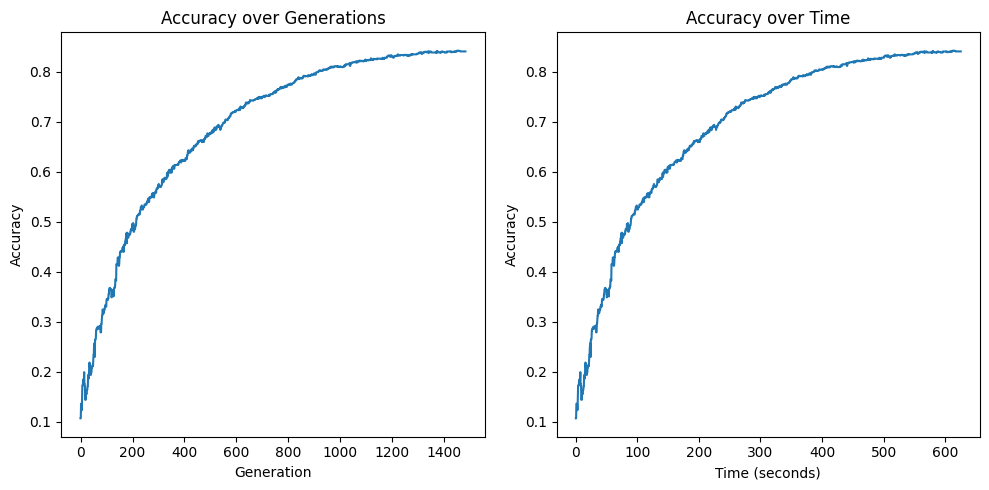

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

subset_indices = torch.randperm(len(train_dataset))[:10000]
train_subset = Subset(train_dataset, subset_indices)

train_size = len(train_subset)
test_size = len(test_dataset)
train_loader = DataLoader(dataset=train_subset, batch_size=train_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_size, shuffle=False)

test_iter = iter(test_loader)
test_data = next(test_iter)

pop = Population(pop_size=200, input_size=28*28, hidden_size=10, output_size=10, dataloader=train_loader)

accuracies = []
times = []

print(len(pop.individuals))
print(pop.get_best_individual().fitness)

best = -10000
last_improve_count = 0

start_time = time.time()
while last_improve_count < 20:
    pop.advance_generation()
    
    gen_best = pop.get_best_individual().fitness
    print(gen_best, pop.get_best_individual().accuracy, end="    ")
    
    accuracies.append(pop.get_best_individual().calculate_fitness(test_data[0], test_data[1])[1])
    times.append(time.time() - start_time)
    
    if gen_best > best:
        best = gen_best
        print("best")
        last_improve_count = 0
    else:
        print("")
        last_improve_count += 1
        
end_time = time.time()

print("Total time:", end_time - start_time)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.title('Accuracy over Generations')

plt.subplot(1,2,2)
plt.plot(times, accuracies)
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')

plt.tight_layout()
plt.show()

In [3]:
best_model = pop.get_best_individual()

loss, acc = best_model.calculate_fitness(test_data[0], test_data[1])

print(acc)


0.8404


In [4]:
from neural_net import MLP
'''

backprop_nn = MLP(input_size=28*28, hidden_size=10, output_size=10)

epochs = 1000
for _ in range(epochs):
    backprop_nn.train_backprop(train_loader)
backprop_nn.calculate_fitness(test_data[0], test_data[1])
'''

'\n\nbackprop_nn = MLP(input_size=28*28, hidden_size=10, output_size=10)\n\nepochs = 1000\nfor _ in range(epochs):\n    backprop_nn.train_backprop(train_loader)\nbackprop_nn.calculate_fitness(test_data[0], test_data[1])\n'

loss: 2.300458  [    0/10000]
Accuracy: 0.1392 Time: 0.8411900997161865
loss: 2.267829  [    0/10000]
Accuracy: 0.1541 Time: 1.7683980464935303
loss: 2.242510  [    0/10000]
Accuracy: 0.1682 Time: 2.6065871715545654
loss: 2.218453  [    0/10000]
Accuracy: 0.1796 Time: 3.4227705001831055
loss: 2.194429  [    0/10000]
Accuracy: 0.195 Time: 4.3119707107543945
loss: 2.170339  [    0/10000]
Accuracy: 0.2073 Time: 5.124153137207031
loss: 2.146002  [    0/10000]
Accuracy: 0.2233 Time: 5.999350309371948
loss: 2.121785  [    0/10000]
Accuracy: 0.2414 Time: 6.806531190872192
loss: 2.097301  [    0/10000]
Accuracy: 0.2605 Time: 7.616714000701904
loss: 2.072335  [    0/10000]
Accuracy: 0.2817 Time: 8.490910530090332
loss: 2.047035  [    0/10000]
Accuracy: 0.3046 Time: 9.310094356536865
loss: 2.021966  [    0/10000]
Accuracy: 0.3171 Time: 10.199293851852417
loss: 1.997160  [    0/10000]
Accuracy: 0.33 Time: 11.018478393554688
loss: 1.972197  [    0/10000]
Accuracy: 0.3424 Time: 11.836663246154785
l

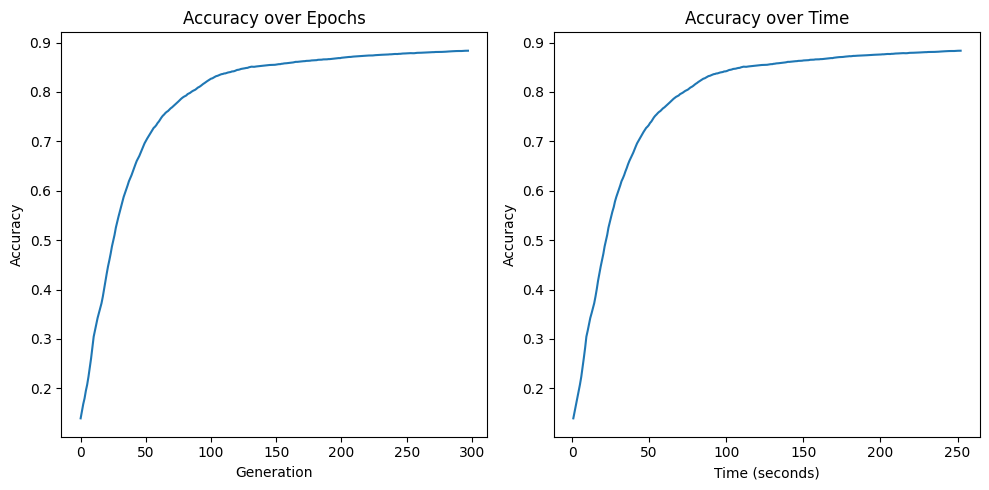

In [5]:
import time
import matplotlib.pyplot as plt

backprop_nn = MLP(input_size=28*28, hidden_size=10, output_size=10)

# Train until loss diference is minimal with unlimited epochs
loss_diff = 100
last_loss = 100
accuracies = []
times = []
start_time = time.time()

while loss_diff > 0.0005:
    loss = backprop_nn.train_backprop(train_loader)
    loss_diff = last_loss - loss
    last_loss = loss
    _, acc = backprop_nn.calculate_fitness(test_data[0], test_data[1])
    accuracies.append(acc)
    times.append(time.time() - start_time)
    end_time = time.time()
    print("Accuracy:", acc, "Time:", end_time - start_time)

#plot the accuracies
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(times, accuracies)
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')

plt.tight_layout()
plt.show()

In [6]:
_, acc = backprop_nn.calculate_fitness(test_data[0], test_data[1])
print(acc)

0.8835
